In [33]:
from affinewarp import PiecewiseWarping, SpikeData
import numpy as np
from affinewarp.visualization import rasters    
import matplotlib.pyplot as plt

In [4]:
mid_brain_circuits=['SCs','SCm','MRN','APN','PAG','ZI']
frontal_circuits=['MOs','PL','ILA','ORB','MOp','SSp']
all_data_path='/media/maria/DATA1/Documents/NeuroMatchAcademy2020_dat/unzipped_files'

(260, 2)
979.8599076072961
65.94206677043901
[59.39520335 59.50560386 59.54113736 ...  3.06668305  3.12781666
  3.26018394]


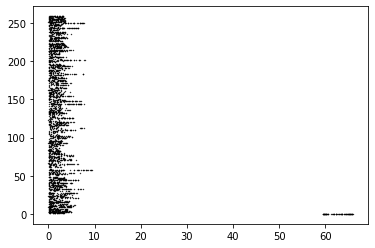

[59.51187055 60.0157062  61.28934539 ...  3.48058495  3.55325195
  3.63988568]


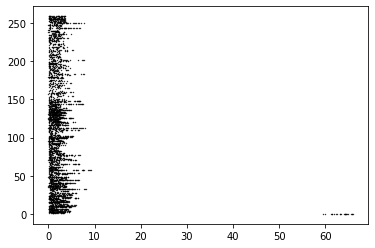

[5.95403040e+01 6.35954893e+01 6.38541238e+01 1.51368418e+00
 7.00017519e-01 1.15164398e+00 3.39164085e+00 1.66493368e+00
 3.98884319e+00 2.50023476e-01 1.22751021e-01 4.44666761e+00
 5.74120690e+00 2.31794230e+00 1.54701069e+00 9.18999669e-01
 3.61797572e+00 1.46624031e+00 2.19154284e+00 3.84983172e-02
 1.70856498e+00 7.89644876e-01 1.70891577e+00 5.27313215e+00
 2.51704117e+00 3.05902505e+00 6.10230570e+00 6.28297320e+00
 2.01256130e+00 7.57558444e-01 1.33383685e+00 4.86664678e+00
 5.76391228e-01 1.32846135e+00 9.62182007e-01 1.33413212e+00
 9.65899947e-01 2.24496210e-02 1.42881346e+00 2.21997678e+00
 5.13482523e+00 4.81766210e-01 3.93311683e+00 1.00499941e+00
 1.07120658e+00 1.35877131e+00 2.76249423e-01 3.71301008e-01
 9.66060711e-01 1.90325946e+00 1.85475257e+00 3.41650020e+00
 6.11847928e+00 3.26227613e+00 1.44582952e+00 2.19415570e+00
 2.06991582e+00 2.40995071e+00 3.89397959e+00 1.48893401e+00
 1.96099152e+00 2.34510103e+00 1.20238090e+00 1.98364894e-01
 1.18022821e+00 3.743230

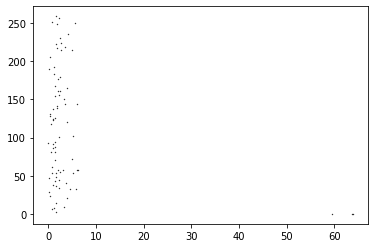

[62.65715167  0.99156284  3.6248288   2.57176325  2.56392953  1.11189356
  1.76119655  2.03905983  0.23764659  3.07449409  0.88083283  3.12808237
  4.83115     3.27400748  3.74557631  1.04813759  1.08203966  1.29960964
  1.91630508  3.32259293  4.75019949  8.49358336  1.15075782  1.58932893
  0.59009423  0.7490572   1.49629831  2.37354129  5.356422    2.35496857
  1.79038348  1.11455108  1.24165167  3.76308148  1.06950724  1.17822733
  1.86356381  2.10436492  1.83984379  1.92037835  3.35600745  2.32648603
  2.79956676  1.93470935  1.68260759  4.44818702  1.458075    2.59384689
  2.08083757  3.80434549  0.79885848  1.31372872  4.07264255  1.14640006
  0.50740055  0.47706726  4.15935085  5.19082226  2.12185867  2.02818448
  1.65570009  0.56367997  0.96725451  3.33966093  1.22371427  0.99059409
  1.27540826  0.32639082  4.61162573  1.15386353  5.0271184   1.78915026
  0.32652478  1.22114597  2.31976306  3.19111483  1.17927696  1.74144205
  7.52713531  2.22175216  0.67281645  2.02452826  0

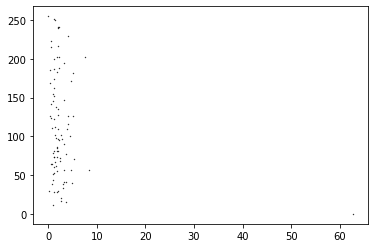

[59.52580395 59.54527071 59.96793932 ...  1.78268926  0.30813704
  2.8674488 ]


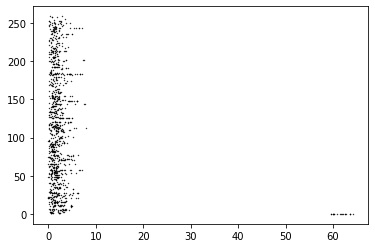

[59.5210706  59.54187069 60.33127432 ...  1.95252337  1.49154248
  1.77457711]


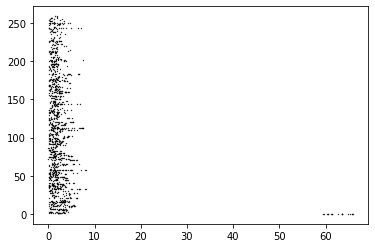

[60.79587645 61.28621204 63.53562238 ...  2.10347862  2.2011124
  3.5342852 ]


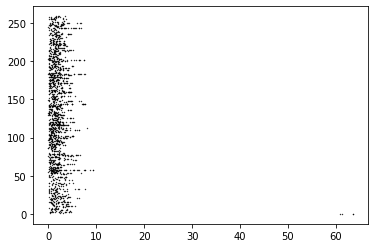

[5.96390711e+01 1.76769369e+00 2.10320216e+00 2.80637206e+00
 3.40870816e+00 3.87684364e+00 4.45267257e+00 5.09014217e+00
 1.98325861e-01 3.35764038e+00 3.53880788e+00 3.60707486e+00
 2.15802206e+00 2.51055808e-01 2.65156684e+00 2.01463479e+00
 3.34057422e+00 3.47121627e-01 1.28449260e+00 2.21520171e+00
 2.42133599e+00 5.80841822e+00 5.88701858e+00 5.46336921e-01
 1.93204329e+00 4.96139054e+00 2.12201195e+00 3.13821662e+00
 2.56730091e+00 4.35237632e+00 2.86402776e-02 2.80992507e+00
 3.28729393e+00 3.76056278e+00 4.66263527e+00 7.11667988e+00
 2.56840725e+00 2.64021346e+00 2.11857351e-01 1.22116199e+00
 1.54755317e+00 1.03630290e+00 9.32226014e-01 6.77040110e-01
 4.44556168e+00 8.31933430e-01 8.47781556e-01 7.35807814e+00
 1.12159054e+00 2.60919738e+00 5.82218578e-01 2.89503493e+00
 6.91088819e-01 6.16760932e-01 7.65233760e-01 8.26600708e-01
 4.27500567e+00 3.16287872e+00 6.90407095e-01 9.73641730e-01
 1.75555262e+00 1.02543108e+00 2.50170453e+00 2.14583951e+00
 1.62271838e+00 4.147939

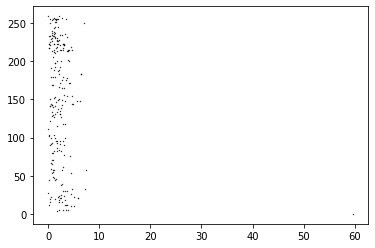

[6.02545406e+01 6.07544096e+01 6.12099784e+01 6.12508785e+01
 6.13658124e+01 6.14204460e+01 6.18691481e+01 6.22300830e+01
 6.31270872e+01 6.36567229e+01 6.49194287e+01 2.29675434e-01
 3.49452377e+00 5.90594690e-01 1.18649743e+00 2.62413737e+00
 9.80481731e-01 1.08168220e+00 9.00526506e-02 1.51005918e+00
 2.88660487e-01 4.06227694e-01 1.68920026e+00 2.45323710e+00
 4.11871142e+00 1.55860479e+00 1.49292116e+00 4.65640827e-01
 1.10443034e+00 2.21810181e+00 2.40620267e+00 4.20771095e+00
 4.44337870e+00 1.00341719e+00 3.04960766e-01 6.62162408e-01
 2.28130318e+00 3.61767128e+00 3.04290618e+00 2.02832935e+00
 2.42589556e+00 3.51130525e+00 1.13906036e+00 4.89482761e-01
 1.64409005e+00 1.64895674e+00 1.09736213e+00 3.14730991e+00
 3.41211701e+00 3.99474615e+00 6.99762314e-01 2.91500777e-01
 1.63339722e+00 2.27836553e+00 5.27819884e+00 4.02543511e-01
 8.42354970e+00 2.58326392e+00 1.67792361e+00 2.00612576e+00
 3.55693677e+00 4.39560117e-01 3.18098372e-01 8.34581308e-02
 2.40150212e+00 3.189100

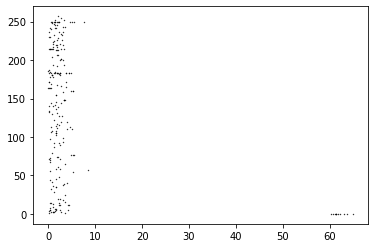

[59.44793693 59.65153786 59.69997142 ...  3.23698383  3.30958416
  3.51625178]


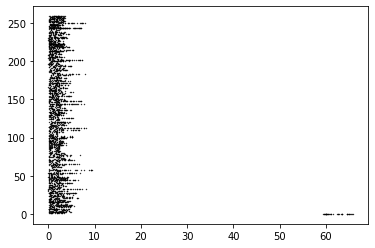

[63.98622445  0.81922907  2.3909898   4.3326079   6.51731046  3.0389134
  3.98461775  1.94754042  3.77674115  0.19050855  6.35680379  2.36945522
  8.33618264  2.57483055  0.12704982  0.99286827  0.43523224  0.36773241
  1.51508772  0.94107789  2.93801396  0.75932881  1.09319701  0.69289133
  0.9487172   3.64918219  0.73770007  1.51294878  1.09785621  7.06631697
  0.28313246  0.98852813  1.50616384  1.98501783  2.34338614  8.03167096
  3.11274932  2.93798427  2.95318434  1.11584007  0.67210169  0.99171895
  0.66897203]


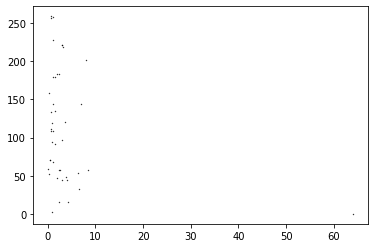

[60.84094333 61.44024608 62.39035045 ...  2.11002409  2.71596021
  0.59913838]


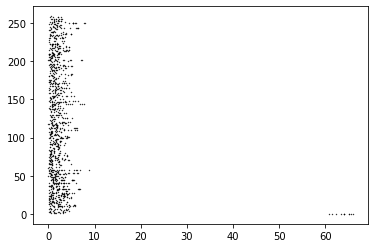

[6.00074062e+01 6.07208428e+01 6.07636096e+01 6.36892564e+01
 6.44978601e+01 6.49822957e+01 6.54084977e+01 7.85414063e-02
 2.91555444e+00 3.29402285e+00 3.35938982e+00 3.53112394e+00
 1.78323350e+00 2.89503861e+00 2.98700570e+00 3.49660804e+00
 1.44678387e+00 1.98878636e+00 2.00568644e+00 2.33852131e+00
 3.10879151e+00 1.27452822e-01 1.15659089e+00 2.01892818e+00
 2.81583184e+00 4.32967213e+00 4.64984027e+00 6.24828698e-01
 1.40429895e+00 2.60323779e+00 3.14767363e+00 3.22210730e+00
 3.36710797e+00 4.13711151e+00 4.50311647e-02 1.47943776e+00
 1.50867122e+00 4.05288292e+00 4.13216201e-01 6.36250559e-01
 1.94611430e+00 9.19596152e-01 4.34007854e+00 9.46823127e-01
 9.87356647e-01 3.51513493e+00 4.07287083e+00 1.53016463e+00
 1.56313145e+00 4.18814351e+00 2.63280371e+00 2.68087060e+00
 4.43044531e+00 4.45731210e+00 4.74131340e+00 6.88049075e-01
 3.75709651e+00 5.23929387e-02 9.07996871e-01 1.70180052e+00
 3.36729428e+00 3.63109550e+00 3.15323581e+00 3.75580525e+00
 1.94952706e+00 2.449862

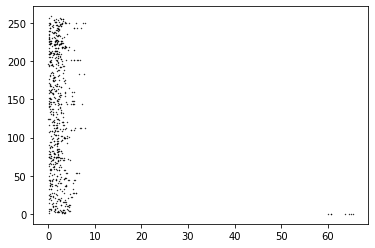

[6.24419174e+01 3.55186021e+00 3.63433560e+00 1.04619730e+00
 2.15356906e+00 3.66660934e+00 1.92515648e+00 4.60388983e-02
 5.23274425e-01 9.49196288e-01 3.25970691e+00 3.54203505e+00
 4.88834124e+00 1.71803216e+00 1.89560033e+00 4.73918006e+00
 2.49627178e-01 1.04059748e+00 1.97212716e+00 1.67216588e+00
 4.13961055e+00 6.38785422e+00 1.69617554e+00 2.56751400e+00
 1.40732879e+00 1.72109690e+00 1.43836293e+00 3.43453757e+00
 6.06411632e+00 6.25448386e+00 2.79505858e-02 1.81148715e+00
 2.54245886e+00 3.41718595e+00 3.06863523e-01 1.10506719e+00
 2.99750922e+00 1.42794122e+00 1.62357546e+00 2.29990503e+00
 2.98120816e+00 2.60807108e+00 5.97682690e+00 1.08469470e+00
 3.49682880e+00 2.66513604e+00 5.22256833e+00 6.75267536e+00
 1.14782399e+00 2.88617229e-01 1.61052395e+00 1.01222628e+00
 2.56070006e+00 2.83487121e+00 6.04408153e+00 7.08266831e-01
 2.37770831e+00 1.24692509e+00 2.09359564e+00 8.99368322e-01
 1.99887337e+00 2.09864050e+00 3.31661276e+00 2.05317843e+00
 7.62092081e-01 3.024310

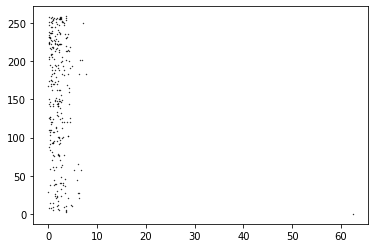

[5.94345702e+01 5.94609037e+01 5.94800037e+01 ... 5.51590089e-02
 3.15746162e+00 2.83487763e+00]


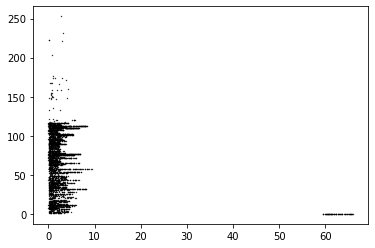

[6.01261734e+01 6.04629083e+01 6.29060862e+01 6.36415895e+01
 3.92209514e-01 4.18860568e-01 3.39290757e+00 4.05082917e+00
 8.14526111e-02 1.48852921e-01 3.55787205e-01 1.83519400e+00
 2.58257103e+00 3.16990706e+00 9.22785209e-01 5.62541272e-01
 4.90194179e-01 1.51749890e+00 1.50521784e-02 2.44836336e+00
 4.94244909e-02 6.09927067e-01 2.52006918e+00 2.73407016e+00
 3.45547348e+00 6.57761305e-01 5.88061864e+00 5.16695072e-01
 1.23283170e+00 6.31457669e-02 5.77781465e-01 1.01361680e+00
 3.71149587e+00 4.41123241e+00 8.96496320e-01 2.39703655e+00
 2.64137101e+00 3.13420660e+00 5.67389306e-01 1.12535854e+00
 1.90122877e+00 1.45251744e-01 4.62953204e-01 4.91820003e-01
 1.48415790e+00 3.28883998e+00 3.84957589e+00 9.21538646e-01
 1.77684258e+00 2.28636582e-01 2.65341439e+00 2.95668245e+00
 3.17068343e+00 3.99225109e-02 2.05759857e+00 4.28747548e+00
 1.61806376e+00 2.78523579e+00 3.08900385e+00 9.09225966e-01
 1.87859709e+00 6.64253510e-01 3.90009675e+00 8.54800893e-01
 8.83817907e-01 1.846589

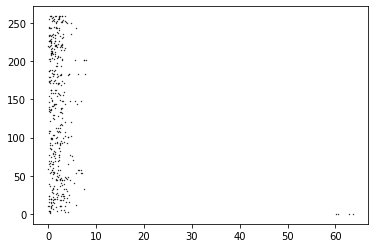

In [99]:
def make_one_neuron_trials_array():
    selected_recordings=['Richards_2017-10-31.tar']
    path=all_data_path+'/'+selected_recordings[0]
    neuron_inds=np.load(path+'/'+'spikes.clusters.npy')
    spk_tms=np.load(path+'/'+'spikes.times.npy')
    trials_orig=np.load(path+'/'+'trials.intervals.npy')
    print(trials_orig.shape)
    #Behavioral data
    #mot_timestamps=np.load(path+'/'+'face.timestamps.npy')
    #mot_energy=np.load(path+'/'+'face.motionEnergy.npy')

    #spk_ids=np.where(neuron_inds==618)
    #spk_tms_one_neuron=spk_tms[spk_ids]
    
    spikes=[]
    neurons=[]
    trials=[]
    neurons_orig=range(618,618+16)
    for neuron in neurons_orig:
        spk_ids=np.where(neuron_inds==neuron)
        spk_tms_one_neuron=spk_tms[spk_ids]
        for trial in range(0,260):
            trial_range= np.bitwise_and(spk_tms_one_neuron>=trials_orig[trial][0],spk_tms_one_neuron<=trials_orig[trial][1])
            if trial==0:
                #trial_range= np.bitwise_and(spk_tms_one_neuron>=trials[trial][0],spk_tms_one_neuron<=trials[trial][1])
                subset=spk_tms_one_neuron[trial_range]
            else:
                subset=spk_tms_one_neuron[trial_range]-trials_orig[trial-1][1]
            for spike in subset:
                trials.append(trial)
                spikes.append(spike)
                neurons.append(neuron)
        #Select spikes in the trial for the neuron that we care about
        #subset=spk_tms_one_neuron[trial_range]
        
        #print(subset)
        #print(trial_range)
    #print(neurons)
    data = SpikeData(trials, spikes, neurons, tmin=trials_orig[-1][0], tmax=trials_orig[-1][1])
    print(data.tmax)
    print(np.max(spikes))
    #BINSIZE = 10.0   # ms
    #NBINS = int((data.tmax - data.tmin) / BINSIZE)
    #MAXLAG = 0.1
    #print(NBINS)
    #spikes=spikes[:6000]
    #neurons=neurons[:6000]
    #trials=trials[:6000]
    #binned = data.bin_spikes(NBINS)
    scatter_kw = dict(s=2, c='k', lw=0, alpha=.8)
    for n in range(618,618+16):
        idx=data.neurons==n
        y, x = data.trials[idx], data.spiketimes[idx]
        print(x)
        #print(y,x)
        plt.scatter(x, y,**scatter_kw)
        plt.show()
make_one_neuron_trials_array()